In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Fraud.csv') #read & shape the data
df.shape

(6362620, 11)

In [3]:
df.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0,0
96,1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19169204.93,0,0
97,1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0,0
98,1,PAYMENT,2875.10,C1412322831,15443.0,12567.90,M1651262695,0.00,0.00,0,0


In [4]:
df.tail(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362520,735,TRANSFER,417103.68,C336307904,417103.68,0.0,C1155915285,0.00,0.00,1,0
6362521,735,CASH_OUT,417103.68,C1450763584,417103.68,0.0,C1377830519,34232.06,451335.75,1,0
6362522,735,TRANSFER,92735.71,C1351323617,92735.71,0.0,C413722554,0.00,0.00,1,0
6362523,735,CASH_OUT,92735.71,C786761311,92735.71,0.0,C570188819,921583.30,1014319.01,1,0
6362524,735,TRANSFER,123146.28,C1625883009,123146.28,0.0,C918154390,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [5]:
df.isnull().values.any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))-

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


In [8]:
# Count transactions by type
count_legit = df[df['isFraud'] == 0].shape[0]
count_fraud = df[df['isFraud'] == 1].shape[0]
total_transactions = count_legit + count_fraud

# Calculate percentage distribution
percent_legit = (count_legit / total_transactions) * 100
percent_fraud = (count_fraud / total_transactions) * 100

# Display results
print(f"Total Legitimate Transactions: {count_legit}")
print(f"Total Fraudulent Transactions: {count_fraud}")
print(f"Legitimate Transactions (%): {percent_legit:.4f}%")
print(f"Fraudulent Transactions (%): {percent_fraud:.4f}%")


Total Legitimate Transactions: 6354407
Total Fraudulent Transactions: 8213
Legitimate Transactions (%): 99.8709%
Fraudulent Transactions (%): 0.1291%


In [9]:
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt

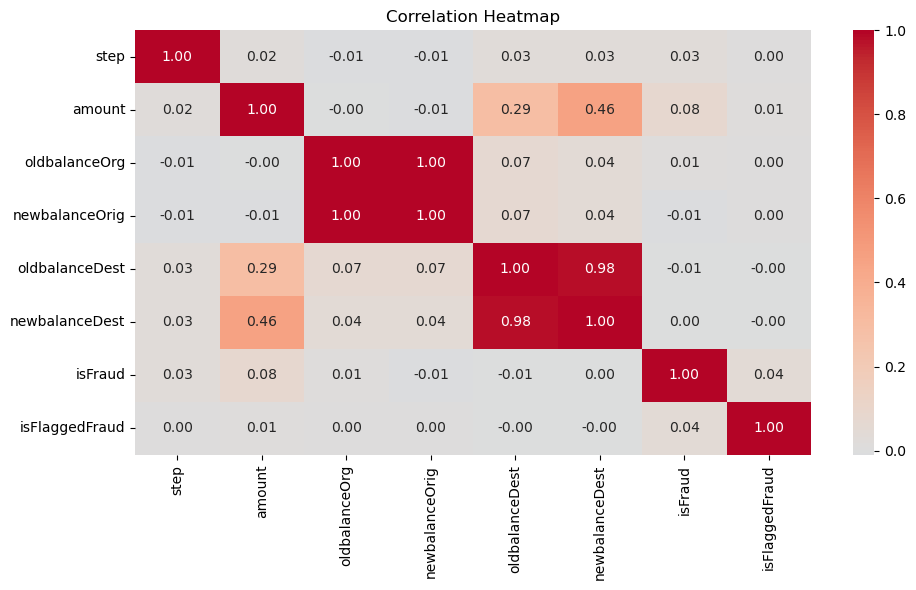

In [21]:
corr = df.corr(numeric_only=True) 

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()  
plt.show()

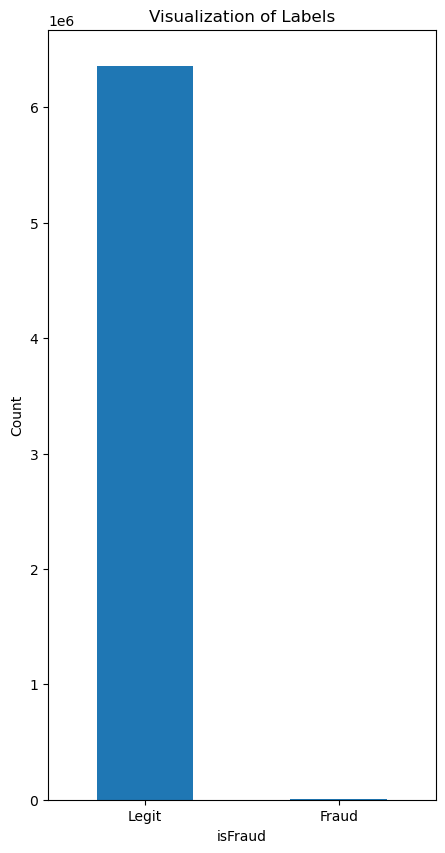

In [22]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [31]:
df1=df.copy()
df1.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [32]:
# Checking how many attributes are dtype: object

objList = df1.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df1[feat] = le.fit_transform(df1[feat].astype(str))

print (df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [34]:
df1.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(df1)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


In [37]:
df1['Actual_amount_orig'] = df1.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df1['Actual_amount_dest'] =df1.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df1['TransactionPath'] = df1.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Drop columns
df1 = df1.drop(['newbalanceOrig','oldbalanceDest','oldbalanceOrg','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(df1)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


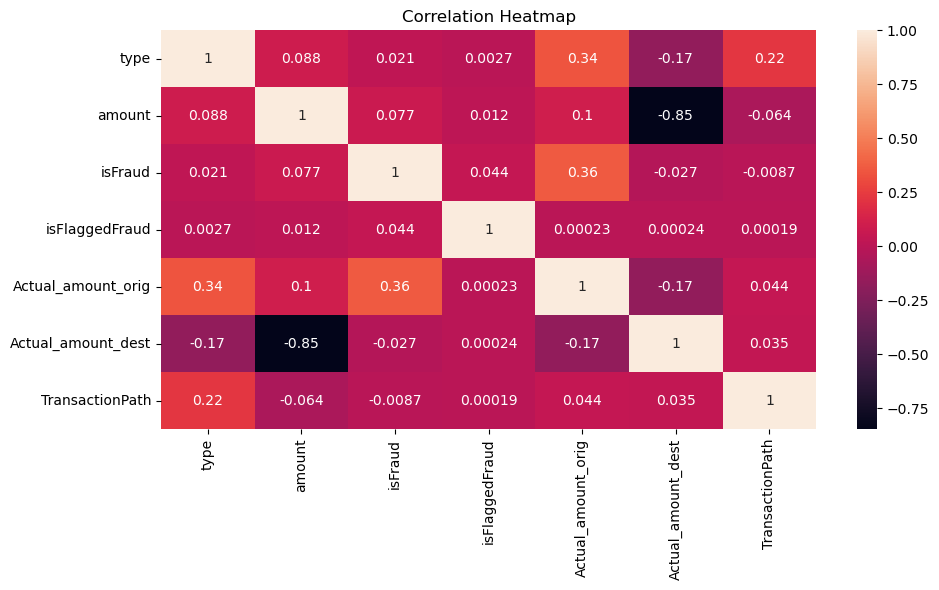

In [43]:
corr=df1.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.tight_layout()  
plt.show()

In [44]:
#Model Building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [45]:
# Perform Scaling
scaler = StandardScaler()
df1["NormalizedAmount"] = scaler.fit_transform(df1["amount"].values.reshape(-1, 1))
df1.drop(["amount"], inplace= True, axis= 1)

Y = df1["isFraud"]
X = df1.drop(["isFraud"], axis= 1)

In [46]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


In [49]:
# Model Training


# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.92304008935523


In [50]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 10
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  9.995892677335227


In [51]:
# key terms of Confusion Matrix -Decision Tree

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')
print("*****************************")

# key terms of Confusion Matrix -Random Forest

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1719
False Positives: 753
True Negatives: 1905598
False Negatives: 716
*****************************
TP,FP,TN,FN - Random Forest
True Positives: 1714
False Positives: 63
True Negatives: 1906288
False Negatives: 721


In [52]:
# Confusion Matrix -Decision Tree

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("********************************************")

# Confusion matrix -Random Forest

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[1905598     753]
 [    716    1719]]
********************************************
Confusion Matrix - Random Forest
[[1906288      63]
 [    721    1714]]


In [55]:
# classification report - Decision Tree

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("***************************************************************")

# classification report -Random Forest

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.70      0.71      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

***************************************************************
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



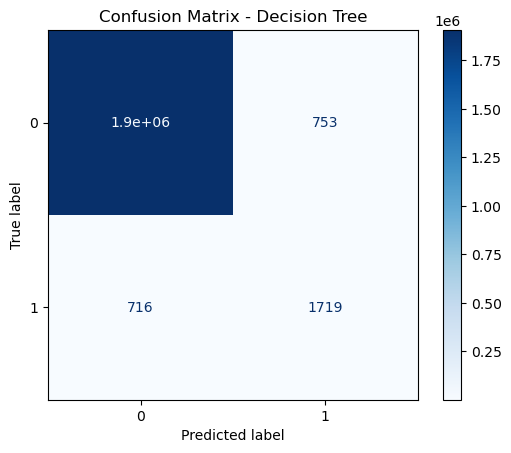

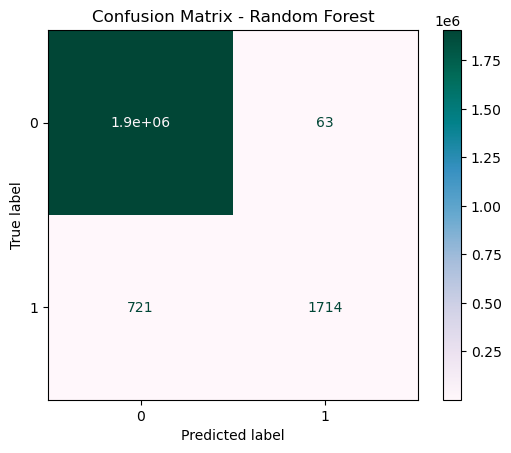

In [60]:
# Visualizing confusion matrix - Decision Tree
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot(cmap='Blues')  # You can change to 'Purples', 'Greens', etc.
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Visualizing confusion matrix - Random Forest
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot(cmap='PuBuGn')  # Use a different colormap here
plt.title('Confusion Matrix - Random Forest')
plt.show()

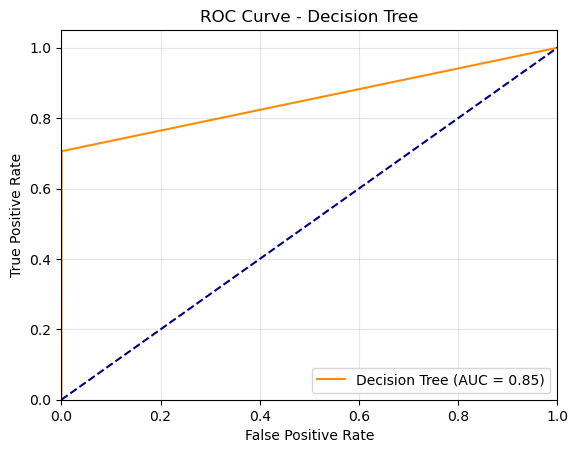

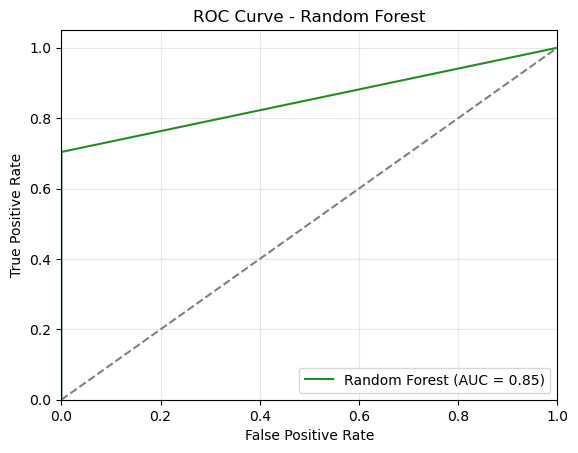

In [62]:
# AUC ROC - Decision Tree
fpr_dt, tpr_dt, _ = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# AUC ROC - Random Forest
fpr_rf, tpr_rf, _ = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='forestgreen', label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Revised Conclusion with Enhanced Clarity and Impact
#### Model Performance and Selection Rationale
Both Random Forest (RF) and Decision Tree (DT) achieve comparable accuracy, but RF outperforms in precision—a critical metric
for fraud detection. In such models, minimizing false positives (legit transactions flagged as fraud) and false negatives
(fraud transactions missed) is paramount. Failing to do so risks:

1.Inconveniencing genuine customers (false alarms).

2.Allowing fraudulent transactions to slip through (missed fraud).

This precision-reliability trade-off makes RF and DT preferable over other algorithms (e.g., XGBoost, Logistic Regression), 
which may yield higher accuracy but poorer fraud-specific performance.

#### Why Random Forest for Unbalanced Data?
The dataset is extremely imbalanced (99.87% legit vs. 0.13% fraud). RF’s ensemble approach—building multiple decision 
trees—helps detect subtle fraud patterns by:

1.Aggregating votes across trees to reduce overfitting.

2.Handling non-linear relationships better than single DT or parametric models (e.g., Logistic Regression).

While slower to train, RF’s robustness justifies its use.

#### Key Fraud-Predicting Factors
#### 1.Request Source Security

* Is the payment link/portal encrypted (HTTPS)?

#### 2.Organization Legitimacy

* Does the recipient’s name match known entities?

#### 3.Vendor Transaction History

* Frequent micro-transactions or sudden large withdrawals?

#### Proactive Fraud Prevention Measures
##### For Companies:

1.Mandate verified apps/websites for transactions.

2.Enforce VPNs + multi-factor authentication (MFA).

3.Monitor vendor histories for anomalies.

##### For Customers:

1.Verify bank e-statements regularly.

2.Log all transactions and report discrepancies immediately.

3.Ignore unsolicited calls/emails—banks never ask for credentials via SMS.

#### Measuring Prevention Effectiveness
##### 1.Track Fraud Metrics
a.Reduction in fraud cases (false negatives).
b.Fewer customer complaints about false flags (false positives).

##### 2.Customer Awareness
a.Surveys on whether users check account activity or recognize phishing attempts.

##### 3.System Logs
a.Analyze login attempts and transaction failures for suspicious patterns.

## Final Takeaway
Fraud detection demands precision over raw accuracy. Random Forest’s ability to handle imbalance and complex rules makes it 
ideal. Meanwhile, user vigilance + secure infrastructure are equally vital to minimize risks. Continuous monitoring ensures 
adopted measures remain effective.